# Linear Models

## 1. A Simple Problem
Let's start with a simple and straightforward learning problem:
 - **Given**: A training set $T = \{(1, 2), (3, 4)\}$ consisting of two pairs of numbers. Each pair has the format $(x_i, y_i)$, where $x_i \in \mathbb{R}$ is the data and $y_i \in \mathbb{R}$ is the target value. 
 - **Seek**: A linear function $y = w_1 x + w_0$ s.t. for any new data $x$, the function will output the best target value $y$ for $x$. 

In this problem, the only parameters to be determined are $w_0$ and $w_1$. As you may have learned in high school, $y = w_1 x + w_0$ is a straight line in the 2-D Euclidean plain, where $w_0$ is called the "*intercept*" of the line, and $w_1$ is called the "*slope"* of the line. What we are looking for is such a line that "*fits*" the training points the best. We will explain what "*fit*" actually means soon later. 

## 2. NBS Hands-On

Let's use *scikit-learn* to solve this learning problem, i.e. obtaining the desired values for $w_0$ and $w_1$. The linear regression model is what we need in this experiment. Please check out the following two links for more details about this model in *scikit-learn*:
1. Linear Regression model API: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
2. Linear models: https://scikit-learn.org/stable/modules/linear_model.html#

**Some non-trivial Q&A:**
1. What is a "*model*" anyway?
    - From a math point of view, for example, a linear model is exactly the function expression of a line, like the one above. The model in math implies some of our beliefs about the desired function. Usually, such beliefs are called *inductive biases*. The beliefs can vary significantly up to problems, scenarios, learners' choices, and some other factors. For example, to learn a function that "fits" (sorry, I use this mysterious term again) the training data in the above problem, rather than a linear function, we may believe that a quadratic function (e.g. $y = w_2 x^2 + w_1 x + w_0$) is more appropriate. Then, this quadratic function will be our *model*, and $w_0, w_1, w_2$ are parameters to be learned.
    - From an engineering point of view (i.e. talking about code), "*model*" usually means more than a math expression with parameters. A *model* implementation typically includes the math realization, some learning algorithms to learn parameters, and some additional arguments (called *hyperparameters*) to control the behaviors of the model and/or the learning algorithms.
2. What is the difference between *learning model* and *learning algorithm*?
    - Now that the term "learning algorithm" has been mentioned, it is necessary to distinguish it from the term "model". Learning algorithms aim to obtain concrete values for parameters specified by learning models. A learning model may collaborate with different learning algorithms. 

### 2.1 Train the Linear Regression Model

In [1]:
# To handle data
import numpy as np
# To access the learning model
from sklearn import linear_model

- We create an instance of the class `LinearRegression` (provided in the package `linear_model`), which is the linear regression model to be learned.

In [37]:
# Construct data structures for data (X) and target values (Y). 
# Both X and Y are NumPy ndarray. 
# Required by scikit-learn, X must be a 2-D array. Each element in this array is a data point represented by an array containing 
# all data attribute values. In our problem, the data only has one attribute. This is why each element in X is 1-dim. 
X = np.asarray([[1], [3]])
Y = np.asarray([2, 4])

In [38]:
X

array([[1],
       [3]])

In [4]:
Y

array([2, 4])

In [5]:
# Train the linear regression model.
# 'fit()' is the high-level API function call for training. When it finishes successfully, the training is done. 
lin_reg = linear_model.LinearRegression().fit(X, Y)

In [6]:
# Obtain the score of the learning quality. 1.0 is the best score, which means the learned model perfectly "fits" the training data.
# Any other scores less than 1.0, which can be negative, indicate the imperfection of fitting the training data. 
# In our case, the score is 1.0, because two points determine a line. 
lin_reg.score(X, Y)

1.0

In [7]:
# 'coef_' gives all learned parameters for "slope", i.e. all w_i except w_0, the intercept. Don't forget that if our data have more
# attributes (e.g. x_i=[x_0, x_1, X_2]), then the learning algorithm will output more learned parameters.
lin_reg.coef_

array([1.])

In [8]:
# 'intercept_' gives the learned w_0, the intercept. 
lin_reg.intercept_

1.0000000000000004

- Up to this point, we have learned $w_0=1.0$ and $w_1=1.0$. And, thus, the learned straight line is $y = x + 1.0$. Now, let's figure the line as well as the training points to visually examine if the line "fits" the training data. 

In [9]:
# Create a sample for X to draw the line.
x_samples = [[I] for I in range(-10, 10, 1)]
# Obtain the values of Y corresponding to the sample of X.
y_vals = lin_reg.predict(x_samples)

In [10]:
y_vals

array([-9.00000000e+00, -8.00000000e+00, -7.00000000e+00, -6.00000000e+00,
       -5.00000000e+00, -4.00000000e+00, -3.00000000e+00, -2.00000000e+00,
       -1.00000000e+00,  6.66133815e-16,  1.00000000e+00,  2.00000000e+00,
        3.00000000e+00,  4.00000000e+00,  5.00000000e+00,  6.00000000e+00,
        7.00000000e+00,  8.00000000e+00,  9.00000000e+00,  1.00000000e+01])

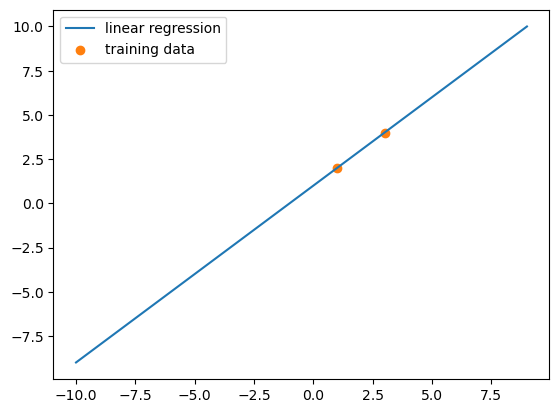

In [11]:
# To draw figures
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x_samples, y_vals, label='linear regression')
ax.scatter(X.flatten(), Y, label='training data', color='tab:orange')
plt.legend()

- As reasonably expected, the learned straight line perfectly "fits" the two training data points, i.e. the two points accurately fall onto the line, because two points establish a line. (Note that we have not formally explained what "fit" means, and it does not mean that ALL training points are required to fall onto the curve of the learned function.)

## 3. Pop Up the Hood of Learning

During the learning above, the empirical goal is to determine the most appropriate values of $w_0$ and $w_1$ respectively so that the straight line parameterized by $w_0$ and $w_1$ "fits" the training data. Essentially, determining the values of parameters in machine learning is an **optimization problem**. In an optimization problem, two primary topics are **objectives** (i.e. what to optimize) and **optimization algorithms** (i.e. how to optimize). 
<!-- Now that we have known the values are in the range $(- \infty, + \infty)$, then, theoretically speaking, it is a plan to go through all possible values in the range and test each value against some specific criteria to identify the ones in desire. To do so, we have to define the criteria beforehand. -->

### 3.1 Objectives

Informally, yet intuitively, the **objective** of a learning problem is a function that takes training data and possible values of desired parameters of the learning model (math-wise) as input, and outputs, typically, a real value indicating the quality of the current parameter values. The **optimization**, on the other hand, means an algorithmic procedure that seeks the parameter values maximizing or minimizing the returned value of the objective. 

The term "**fit**" means that the objective has been optimized as much as possible using the training data. Nonetheless, it's important to note that, even if the returned value of the objective couldn't be further improved in terms of the model and data in the training, the resulting model with the learned parameters may not be the optimality reflecting the true patterns of the data. 

Now, let's take a look at some typical objectives in linear regression. 

### 3.2 Least Squares in Linear Regression

**Least squares** is the most popular objective in linear regression. The motivation is to minimize the difference between $y_i$ in the training data and $\hat{y}_i$ predicted by the model. The objective is to seek a set of parameter values $\vec{\boldsymbol{w}}$ s.t. the following function is minimized:
$$
    s(\vec{\boldsymbol{w}}) = \sum\limits_{(x_i, y_i) \in T} (y_i - \hat{y}_i)^2
$$
where the vector $\vec{\boldsymbol{w}}$ contains all parameters for the model (e.g. in our above example, $\vec{\boldsymbol{w}} = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$), and $T$ is the training data set. In a more mathematical way, this objective is written as:
$$
    \DeclareMathOperator*{\argmin}{arg\,min}
    \argmin\limits_{\vec{\boldsymbol{w}}} \sum\limits_{(x_i, y_i) \in T} (y_i - \hat{y}_i)^2
$$
where "$\argmin\limits_{\boldsymbol{\theta}} f(x;\boldsymbol{\theta})$" means "seeking parameters $\boldsymbol{\theta}$ that minimize the function $f(x; \boldsymbol{\theta})$ parameterized by $\boldsymbol{\theta}$". 

### 3.3 Optimization Algorithms

An **optimization algorithm** is a programmatic procedure determining the exact or approximate values of desired parameters of a given objective. Typically, the designs of such algorithms follow either (sometimes, both) of the two directions: **analytic** and **searching**. 

**Analytic** methods directly compute solutions, exactly or approximately, to the problems. And, **searching** methods usually iteratively refine candidate solutions until some terminal conditions are satisfied. 

### 3.4 Solve Linear Least Squares Analytically
In our above example, it has already known that $\hat{y}_i = w_0 + w_1 x_i$, and thus the objective to be minimized is rewritten as: 
$$
    s \Big(\begin{bmatrix} w_0 \\ w_1 \end{bmatrix} \Big) = \Big(y_1 - (w_0 + w_1 x_1)\Big)^2 + \Big(y_2 - (w_0 + w_1 x_2)\Big)^2
$$
This formula can also be written in a matrix form:
$$
    s (\vec{\boldsymbol{w}}) = (Y - \hat{Y})^T (Y - \hat{Y})
$$
where $Y = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}$, and $\hat{Y} = X \vec{\boldsymbol{w}} = \begin{bmatrix} 1 & x_1\\ 1 & x_2 \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$. Particularly, each row of $X$ is a data point, and we append $1$ to the front of each data row for convenience. (*<ins>Exercise</ins>: Please convince yourself that the matrix form is equal to the original form.*)

In Calculus, we have learned that to find optima of a function we need to differentiate the function and let the derivative be zero. It is similar to Multivariate Calculus. This derivative is as follows:
$$
    \boldsymbol{D}s(\vec{\boldsymbol{w}}) 
    = 2 (Y - X \vec{\boldsymbol{w}})^T (- X)
$$
*<ins>NOTE</ins>: To understand how we got this formula, the derivative and the chain rule in Multivariate Calculus are needed. (<ins>Exercise</ins>: Please try to derive this formula by yourself.)* 

Let $\boldsymbol{D}s(\vec{\boldsymbol{w}})$ be zero, and thus we get: 
$$
    (Y - X \vec{\boldsymbol{w}})^T X = 0
$$
And, if $X^T X$ is nonsingular (i.e. its inverse exists), then 
$$
    \vec{\boldsymbol{w}} = (X^T X)^{-1} X^T Y
$$

Next, let's try to compute $w_0$ and $w_1$ using this formula.

In [55]:
# As mentioned above, we need to append '1' to each data point. 
X_ext = np.append([[1]]*2, X, axis=1)

In [51]:
X_ext

array([[1, 1],
       [1, 3]])

In [54]:
# NumPy will automatically recognize an 1-d array as a vector (i.e. a column vector in math), and it can be directly multiplied to a matrix.
Y

array([2, 4])

In [53]:
# Compute w_0 and w_1.
np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_ext), X_ext)), np.transpose(X_ext)), Y)

array([1., 1.])

The resulting vector is $\begin{bmatrix} 1.0 \\ 1.0 \end{bmatrix}$, i.e. $w_0 = 1.0$ and $w_1 = 1.0$. This is consistent with the results obtained from `linear_model.LinearRegression().fit(X, Y)`. 

Everything looks pretty neat so far in linear regression. Nonetheless, two facts need to be emphasized:
 - (1) Analytically solving an optimization problem does not mean that it guarantees optimal solutions. The above example is one of the simplest cases of linear regression, and it is easy to find the optimal solution.
 - (2) Though many optimization problems can be solved analytically, much more cannot. And, most optimization problems are NP-Hard, which means that it is unknown to humans yet if there exist polynomial-time algorithms to give exact and optimal solutions. Thus, when solving optimization problems in general, we may need to consider using searching approaches and outputting approximate solutions.